# hwp

In [1]:
from pathlib import Path
import os
import pandas as pd

In [2]:
path = Path(Path.cwd())
par = str(path.parent)
saving_path = par + "/datafiles/master-table/"

In [3]:
data_file = par + "/datafiles/raw-data/"
for data_dir in os.listdir(data_file):
    if data_dir == '.DS_Store' or data_dir == 'incruit-dom':
        continue
    for file in os.listdir(data_file + data_dir):
        ext = file[-3:]
        if ext == 'hwp':
            filename = par + "/datafiles/hwp-to-txt/" + file[:-4] + ".txt"
            output = '--output ' + '"' + filename + '"'
            exefile = 'hwp5txt'
            result = '"' + data_file + data_dir+'/'+file + '"'
            
            os.system(exefile + " " + output + " " + result)

In [14]:
txt_path = par + "/datafiles/hwp-to-txt/"
site_name = ['INCRUIT', 'incruit', '인크루트']

corp_list = []
task_list = []

for file in os.listdir(txt_path):
    fname = file[:-4].strip()
    for n in site_name:
        if file.startswith(n):
            temp = fname[len(n):].split("_")
            if len(temp) >= 3:
                corp_list.append(temp[1])
                task_list.append(temp[2])
            else:
                letter = temp[1].split("(")
                if len(letter) == 1:
                    corp_list.append(letter[0])
                else:
                    corp_list.append(letter[0])
                    task_list.append(letter[1][:-1])

In [15]:
company_df = pd.DataFrame(corp_list, columns=['name'])
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    590 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


In [16]:
task_df = pd.DataFrame(task_list, columns=['name'])
task_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    340 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [17]:
# 중복 제거
company_df = company_df.drop_duplicates(['name'], keep='first')
task_df = task_df.drop_duplicates(['name'], keep='first')

In [18]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 589
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    515 non-null    object
dtypes: object(1)
memory usage: 8.0+ KB


In [19]:
task_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 338
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    206 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


<AxesSubplot:>

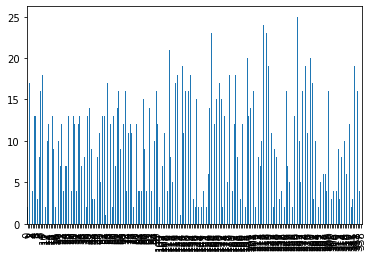

In [20]:
task_df.name.map(len).plot(kind='bar')

<AxesSubplot:>

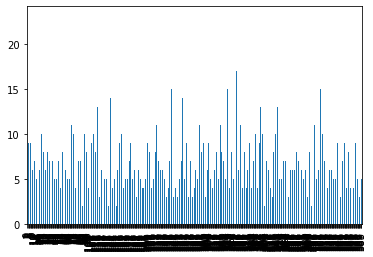

In [21]:
company_df.name.map(len).plot(kind='bar')

In [24]:
company_df.name.map(len).sort_values()

350     0
137     2
293     2
89      2
358     2
       ..
353    17
160    18
510    19
154    22
44     23
Name: name, Length: 515, dtype: int64

In [26]:
# - 로 split 하면 (기업명, 직무) 가 나올 것 같다
company_df.loc[154]

name    cafebene-oversea sales
Name: 154, dtype: object

In [29]:
for idx, row in company_df.iterrows():
    if idx in [5, 46, 51, 83, 96, 108, 200, 262, 301, 375, 575]:
        continue
    else:
        if len(row['name'].split('-')) > 1:
            row['name'].split('-')[0] 
            row['name'].split('-')[1]

5 ['kepco', 'enc']
32 ['ELAND', 'SE']
44 ['kyowon', 'sales management']
46 ['sae', 'a']
51 ['hyundai', 'wia']
83 ['MG', 'BANK']
96 ['hhic', 'tms']
108 ['KLA', 'Tencor']
149 ['SEMES', 'FE']
154 ['cafebene', 'oversea sales']
160 ['incruit', 'management']
200 ['ahn', 'gook']
260 ['DONGBOO', 'Bodily']
262 ['can', 'suhyuP']
301 ['k', 'vic']
324 ['hanabank', 'banker']
346 ['class', 'a']
374 ['I', 'NOS']
375 ['S', 'OIL']
434 ['SAE', 'A']
446 ['inicis', 'sales']
458 ['S', '0il']
524 ['S', 'oil', 'Technology']
575 ['INTER', 'M']


In [ ]:
# 하드코딩 : 기업명에 -가 들어있는 경우
[5, 46, 51, 83, 96, 108, 200, 262, 301, 375, 575]

# pdf

In [ ]:
from src.pdfPreprocessor import PdfDocument
